Missing values in features:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Missing values in labels:
 0
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333


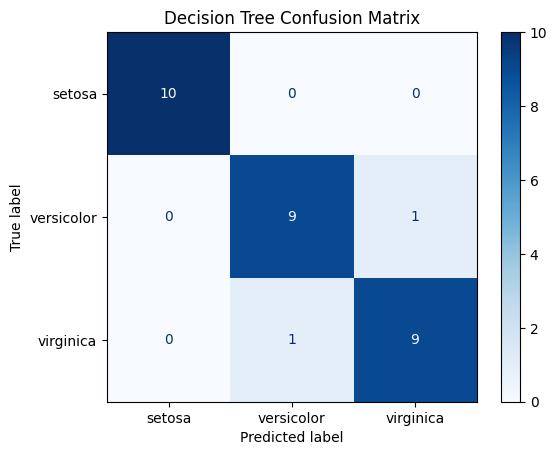

In [ ]:
# ===============================================
# AI Tools Assignment: Mastering the AI Toolkit
# Student: Adeyemi Ayorinde
# Date: 10-Nov-2025
# ===============================================

# ===============================
# Part 1: Classical ML with Scikit-learn (Iris Dataset)
# ===============================

# 1. Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2. Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# 3. Check for missing values
print("Missing values in features:\n", X.isnull().sum())
print("Missing values in labels:\n", y.isnull().sum())

# 4. Encode labels (optional for Iris dataset)
# le = LabelEncoder()
# y = le.fit_transform(y)

# 5. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 7. Make predictions
y_pred = dt_model.predict(X_test)

# 8. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# 9. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()


# plt.savefig("iris_confusion_matrix.png")


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.8072 - loss: 0.6256 - val_accuracy: 0.9803 - val_loss: 0.0633
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9689 - loss: 0.1053 - val_accuracy: 0.9888 - val_loss: 0.0433
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9782 - loss: 0.0749 - val_accuracy: 0.9900 - val_loss: 0.0385
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9830 - loss: 0.0576 - val_accuracy: 0.9910 - val_loss: 0.0332
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9860 - loss: 0.0462 - val_accuracy: 0.9907 - val_loss: 0.0337
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9886 - loss: 0.0336
Test Accuracy: 0.9911


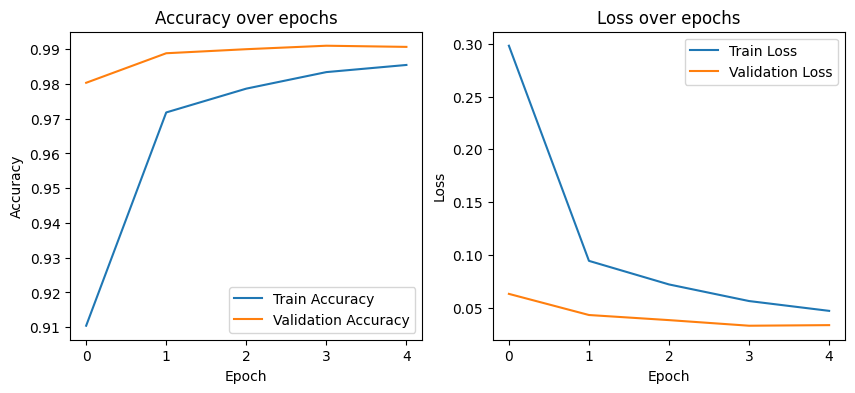

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


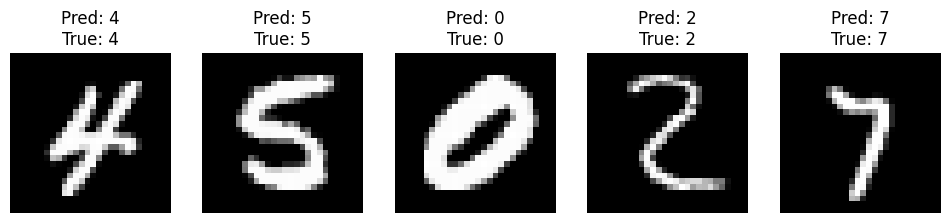

In [2]:

# ===============================
# Part 2: Deep Learning with TensorFlow/Keras (MNIST)
# ===============================

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# 1. Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 4. Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 6. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# 7. Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Visualize 5 sample predictions
sample_idx = np.random.choice(X_test.shape[0], 5, replace=False)
sample_images = X_test[sample_idx]
sample_labels = y_test[sample_idx]

predictions = model.predict(sample_images)
pred_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.show()

# Screenshot placeholder: Save plots for PDF submission
# plt.savefig("mnist_sample_predictions.png")


In [3]:

# ===============================
# Part 3: NLP with spaCy (Amazon Reviews)
# ===============================

import spacy
from spacy import displacy

# Load English model (Colab has it pre-installed)
nlp = spacy.load("en_core_web_sm")

# Sample Amazon reviews
reviews = [
    "I love the Samsung Galaxy S21! The camera is amazing.",
    "The Apple MacBook Air is very lightweight but expensive.",
    "Terrible experience with the Bose headphones. Sound quality is poor.",
    "I am happy with the Sony WH-1000XM4. Great noise cancellation!",
    "The Amazon Echo Dot works perfectly for my home."
]

# 1. Named Entity Recognition (NER)
print("---- Named Entities ----")
for review in reviews:
    doc = nlp(review)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    print(f"Review: {review}")
    print("Entities:", entities)
    print()

# Optional visualization (in Colab)
# displacy.render(nlp(reviews[0]), style="ent")

# 2. Rule-based sentiment analysis
positive_words = ["love", "amazing", "great", "perfectly", "happy"]
negative_words = ["terrible", "poor", "expensive", "bad", "disappointed"]

def analyze_sentiment(text):
    text_lower = text.lower()
    pos_count = sum(word in text_lower for word in positive_words)
    neg_count = sum(word in text_lower for word in negative_words)
    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

print("---- Sentiment Analysis ----")
for review in reviews:
    sentiment = analyze_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}")
    print()

# Screenshot placeholder: Save outputs for PDF submission


---- Named Entities ----
Review: I love the Samsung Galaxy S21! The camera is amazing.
Entities: [('the Samsung Galaxy S21', 'FAC')]

Review: The Apple MacBook Air is very lightweight but expensive.
Entities: [('The Apple MacBook Air', 'ORG')]

Review: Terrible experience with the Bose headphones. Sound quality is poor.
Entities: [('Bose', 'NORP')]

Review: I am happy with the Sony WH-1000XM4. Great noise cancellation!
Entities: [('the Sony WH-1000XM4', 'LAW')]

Review: The Amazon Echo Dot works perfectly for my home.
Entities: [('Echo Dot', 'PERSON')]

---- Sentiment Analysis ----
Review: I love the Samsung Galaxy S21! The camera is amazing.
Sentiment: Positive

Review: The Apple MacBook Air is very lightweight but expensive.
Sentiment: Negative

Review: Terrible experience with the Bose headphones. Sound quality is poor.
Sentiment: Negative

Review: I am happy with the Sony WH-1000XM4. Great noise cancellation!
Sentiment: Positive

Review: The Amazon Echo Dot works perfectly for my h